In [34]:
import numpy as np
from scipy.linalg import expm
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere

# Defining the molecular Hamiltonian for H2
h2_hamiltonian = (-1.052373245772859 * np.kron(np.eye(2), np.eye(2))
                  + 0.39793742484318045 * np.kron(np.eye(2), np.array([[1, 0], [0, -1]]))
                  + 0.39793742484318045 * np.kron(np.array([[1, 0], [0, -1]]), np.eye(2))
                  - 0.01128010425623538 * np.kron(np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, -1]])))

# Creating a quantum circuit
num_qubits = 2
qc = QuantumCircuit(num_qubits)

# Step 1: Initializing the circuit with a Hadamard gate on each qubit
for qubit in range(num_qubits):
    qc.h(qubit)

# Applying Trotter-Suzuki decomposition to obtain unitary gates
num_time_steps = 10
evolution_gates = [expm(-1j * h2_hamiltonian / num_time_steps) for _ in range(num_time_steps)]

# Step 2: Applying each evolution gate in sequence to simulate time evolution
for gate in evolution_gates:
    qc.unitary(gate, range(num_qubits))

# Step 3: Simulating the circuit to obtain the final statevector
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc).result()
statevector = result.get_statevector()

Final Quantum State:


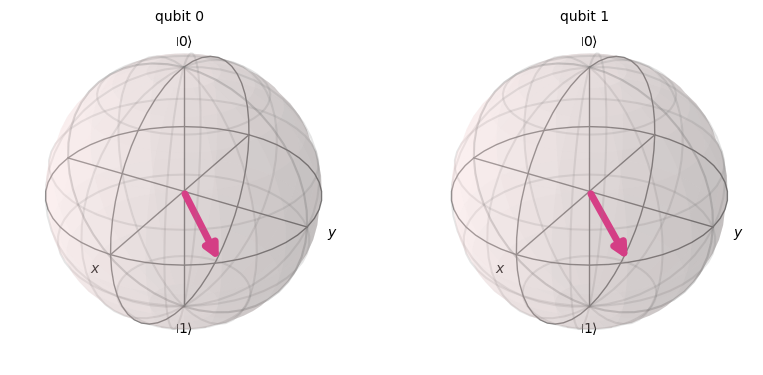

In [31]:
# Step 4: Visualizing the final statevector using a Bloch sphere diagram
print("Final Quantum State:")
plot_bloch_multivector(statevector)

In [33]:
# Step 5: Measure the qubits and simulate measurements
qc.measure_all()

# Step 6: Simulate measurements using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1000).result()
counts = result.get_counts()


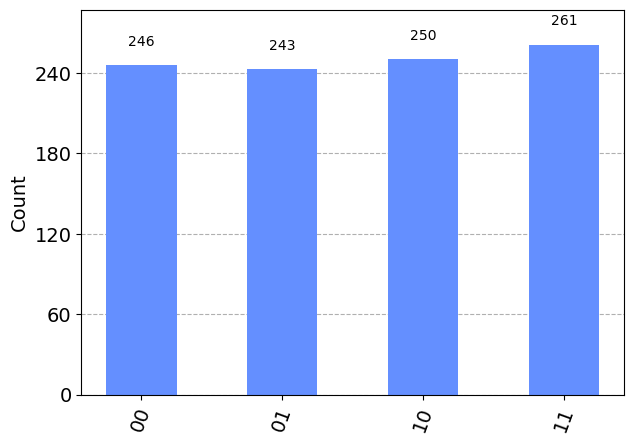

In [25]:
# Step 7: Visualizing measurement results using a histogram
plot_histogram(counts)


Quantum State on QSphere:


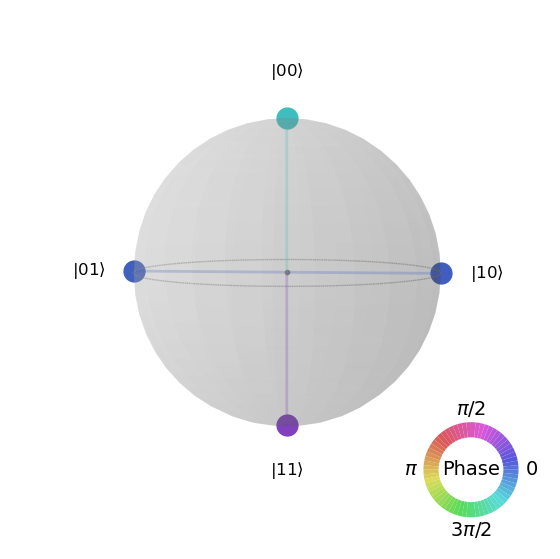

In [26]:
#Step 8: Visualization: Quantum State on the QSphere
print("\nQuantum State on QSphere:")
plot_state_qsphere(statevector)